In [2]:
# import libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

In [ ]:
# import data

prop = pd.read_csv('C:\\Users\\sonja tilly.ABERDEEN\\Zillow\\properties_2016.csv\\properties_2016.csv',\
                  low_memory=False)
train = pd.read_csv('C:\\Users\\sonja tilly.ABERDEEN\\Zillow\\train_2016.csv\\train_2016.csv',\
                  low_memory=False)
sample = pd.read_csv('C:\\Users\\sonja tilly.ABERDEEN\\Zillow\\sample_submission.csv\\sample_submission.csv',\
                  low_memory=False)


In [ ]:
# merge dataframes

df_train = train.merge(prop, how='left', on='parcelid')

In [ ]:
print(df_train.shape)
print(df_train.info())
print(df_train.columns)

(90811, 60)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90811 entries, 0 to 90810
Data columns (total 60 columns):
parcelid                        90811 non-null int64
logerror                        90811 non-null float64
transactiondate                 90811 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefe

## Exploratory Data Analysis

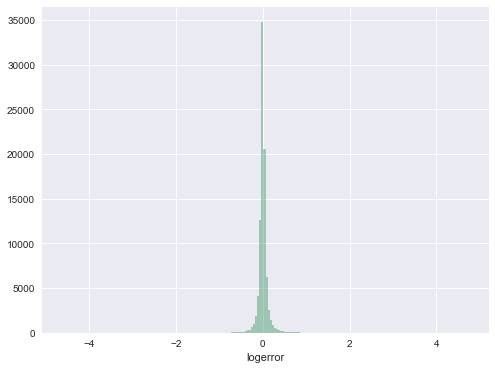

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df_train['logerror'], bins=200, kde=False, color='seagreen')

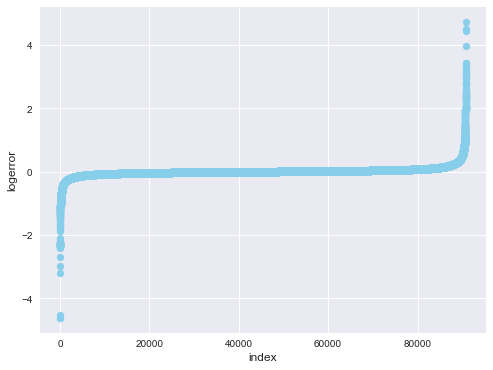

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.logerror.values), color='skyblue')
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [ ]:
null_df = prop.isnull().sum(axis=0).reset_index()
null_df.columns = ['name', 'count']
sorted_null = null_df.sort_values('count', ascending=False)
sorted_null.head()

,name,count
41,storytypeid,2983593
3,basementsqft,2983589
46,yardbuildingsqft26,2982570
49,fireplaceflag,2980054
2,architecturalstyletypeid,2979156


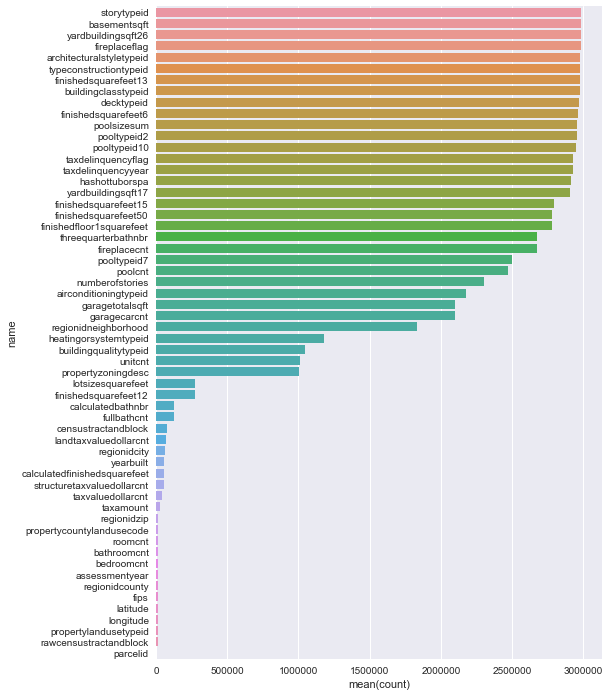

In [ ]:
plt.figure(figsize=(8,12))
ax1 = sns.barplot(x='count', y='name', data=sorted_null)

In [ ]:
df_train['transactiondate'] = pd.to_datetime(df_train.transactiondate)
df_train.transactiondate.head()

0   2016-01-01
1   2016-01-01
2   2016-01-01
3   2016-01-02
4   2016-01-02
Name: transactiondate, dtype: datetime64[ns]

In [ ]:
from datetime import date 
import time
from datetime import datetime

mydate = date(2016,12,31)  #year, month, day

#today = date.today()
days = mydate - df_train.transactiondate

df_train['days'] = days
df_train['days'] = pd.to_numeric(df_train.days)

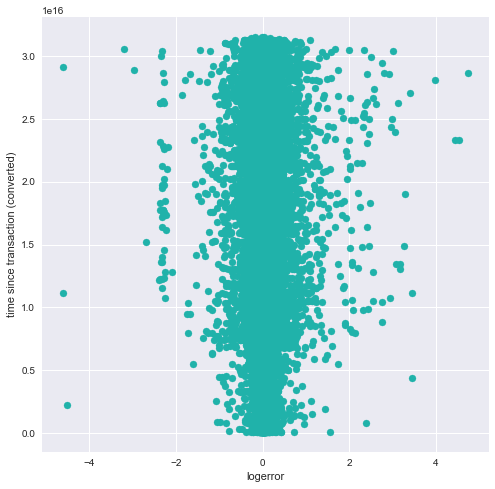

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(df_train.logerror, df_train.days, color='lightseagreen')
plt.xlabel("logerror")
plt.ylabel("time since transaction (converted)")

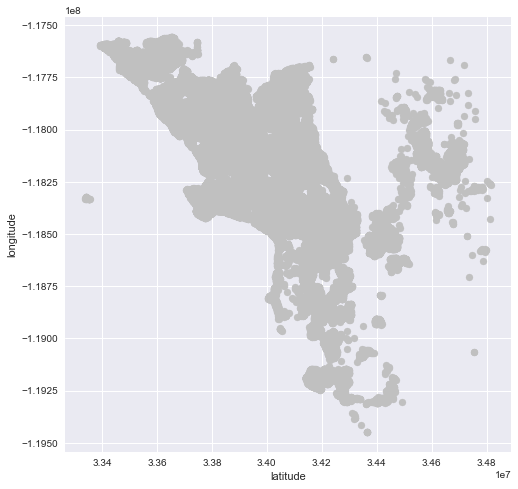

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(df_train.latitude, df_train.longitude, color='silver')
plt.xlabel("latitude")
plt.ylabel("longitude")

In [ ]:
median_values = df_train.median(axis=0)
df_train_new = df_train.fillna(median_values, inplace=True)

In [ ]:
df_train_new['transactiondate'] = pd.to_numeric(df_train_new['transactiondate'])

In [ ]:
#Encode columns containing object data types

from sklearn import preprocessing 

le = preprocessing.LabelEncoder()

df_train_new['hashottuborspa'] = le.fit_transform(df_train_new['hashottuborspa'])
df_train_new['fireplaceflag'] = le.fit_transform(df_train_new['fireplaceflag'])

df_train_new['propertyzoningdesc'] = df_train_new['propertyzoningdesc'].factorize()[0]
df_train_new['propertyzoningdesc'] = le.fit_transform(df_train_new['propertyzoningdesc'])

df_train_new['propertycountylandusecode'] = df_train_new['propertycountylandusecode'].factorize()[0]
df_train_new['propertycountylandusecode'] = le.fit_transform(df_train_new['propertycountylandusecode'])

df_train_new['taxdelinquencyflag'] = df_train_new['taxdelinquencyflag'].factorize()[0]
df_train_new['taxdelinquencyflag'] = le.fit_transform(df_train_new['taxdelinquencyflag'])
            

C:\Users\sonja tilly.ABERDEEN\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\numpy\lib\arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [ ]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90811 entries, 0 to 90810
Data columns (total 61 columns):
parcelid                        90811 non-null int64
logerror                        90811 non-null float64
transactiondate                 90811 non-null int64
airconditioningtypeid           90811 non-null float64
architecturalstyletypeid        90811 non-null float64
basementsqft                    90811 non-null float64
bathroomcnt                     90811 non-null float64
bedroomcnt                      90811 non-null float64
buildingclasstypeid             90811 non-null float64
buildingqualitytypeid           90811 non-null float64
calculatedbathnbr               90811 non-null float64
decktypeid                      90811 non-null float64
finishedfloor1squarefeet        90811 non-null float64
calculatedfinishedsquarefeet    90811 non-null float64
finishedsquarefeet12            90811 non-null float64
finishedsquarefeet13            90811 non-null float64
finishedsquaref

In [ ]:
corr_matrix = df_train_new.corr()
corr = pd.DataFrame(corr_matrix.logerror.iloc[2:])
corr_sorted = corr.logerror.sort_values(ascending=False)
corr_sorted = pd.DataFrame(corr_sorted)
corr_sorted.columns = ['corr']
corr_sorted['color']= np.where(corr_sorted['corr']>=0, 'darkcyan', 'gold')
corr_sorted.fillna(0).tail()

,corr,color
pooltypeid10,0.0,gold
pooltypeid2,0.0,gold
pooltypeid7,0.0,gold
storytypeid,0.0,gold
assessmentyear,0.0,gold


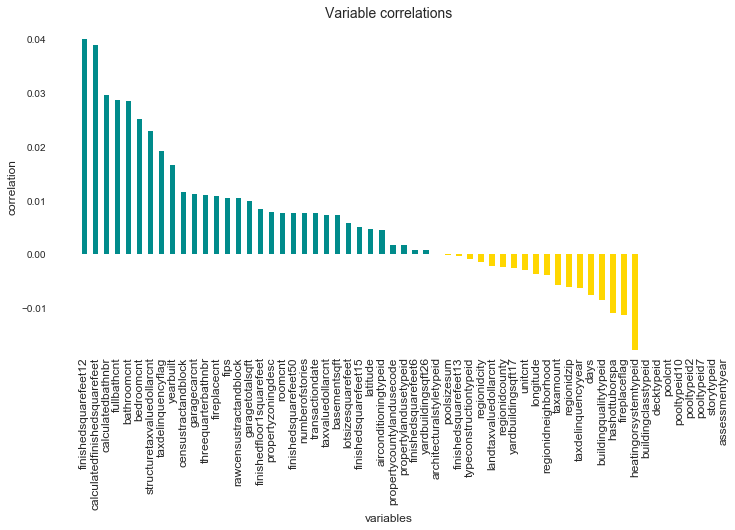

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams['axes.facecolor'] = 'white'

pos = np.arange(len(corr_sorted.index))
width = 0.5
plt.bar(pos, corr_sorted['corr'], width, color=corr_sorted.color)

plt.xticks(pos, corr_sorted.index, rotation=90, fontsize=12)
plt.xlabel('variables', fontsize=12)
plt.ylabel('correlation', fontsize=12)
plt.title('Variable correlations', fontsize=14)

The variables with minimal to no correlation with the logerror have no significant predictive power and can be dropped from the dataset for modelling.

In [ ]:
data = df_train.drop(df_train[['buildingclasstypeid', 'decktypeid', 'poolcnt', 'pooltypeid2',\
                    'storytypeid', 'assessmentyear']], axis=1)

In [ ]:
# define predictors (X) and target (y)

#y = pd.DataFrame(data['logerror'])
y=data['logerror'].ravel()

In [ ]:
#X = data.drop('logerror', axis=1, inplace=True)
X = data
X.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,days
0,11016594,0.0276,1451606400000000000,1.0,7.0,616.0,2.0,3.0,4.0,2.0,...,1.0,0,122754.0,360170.0,237416.0,6735.88,0,14.0,6.037107e+13,31536000000000000
1,14366692,-0.1684,1451606400000000000,1.0,7.0,616.0,3.5,4.0,7.0,3.5,...,1.0,288,346458.0,585529.0,239071.0,10153.02,0,14.0,6.037615e+13,31536000000000000
2,12098116,-0.0040,1451606400000000000,1.0,7.0,616.0,3.0,2.0,4.0,3.0,...,1.0,288,61994.0,119906.0,57912.0,11484.48,0,14.0,6.037464e+13,31536000000000000
3,12643413,0.0218,1451692800000000000,1.0,7.0,616.0,2.0,2.0,4.0,2.0,...,1.0,288,171518.0,244880.0,73362.0,3048.74,0,14.0,6.037296e+13,31449600000000000
4,14432541,-0.0050,1451692800000000000,1.0,7.0,616.0,2.5,4.0,7.0,2.5,...,2.0,288,169574.0,434551.0,264977.0,5488.96,0,14.0,6.059042e+13,31449600000000000


In [ ]:
# split dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20076862935107,\
                                                    random_state=42)

In [ ]:
# build model

from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(random_state=47)
tree.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=47,
           verbose=0, warm_start=False)

In [ ]:
# pre-process properties 2016 file

median_values = prop.median(axis=0)
prop_new = prop.fillna(median_values, inplace=True)

#Encode columns containing object data types

prop_new['hashottuborspa'] = le.fit_transform(prop_new['hashottuborspa'])
prop_new['fireplaceflag'] = le.fit_transform(prop_new['fireplaceflag'])

prop_new['propertyzoningdesc'] = prop_new['propertyzoningdesc'].factorize()[0]
prop_new['propertyzoningdesc'] = le.fit_transform(prop_new['propertyzoningdesc'])

prop_new['propertycountylandusecode'] = prop_new['propertycountylandusecode'].factorize()[0]
prop_new['propertycountylandusecode'] = le.fit_transform(prop_new['propertycountylandusecode'])

prop_new['taxdelinquencyflag'] = prop_new['taxdelinquencyflag'].factorize()[0]
prop_new['taxdelinquencyflag'] = le.fit_transform(prop_new['taxdelinquencyflag'])

prop_new.info()

In [ ]:
# predict on properties_2016 file

pred = tree.predict(prop_new)

pred = pd.DataFrame(pred)

In [ ]:
print("Start writing to file ...")
sub = pd.read_csv('C:\\Users\\sonja tilly.ABERDEEN\\Zillow\\sample_submission.csv\\sample_submission.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = pred
    


In [ ]:
sub.to_csv('submission.csv', index=False, float_format='%.4f')